# Zadanie 3 - drzewa decyzyjne

In [36]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

In [2]:
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [3]:
clf.predict(iris.data[:1, :])

array([0])

In [4]:
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

In [6]:
from sklearn.externals.six import StringIO  
import pydot 

In [7]:
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("iris.pdf")

# Zadanie - klasyfikacja cyfr

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

In [31]:
 # wczytywanie danych
dane = loadmat('baza_mnist.mat.pdf')

In [32]:
#Zad 1. Podziel dane na parametry X oraz odpowiedź y:
X = dane['X']
y = dane['y']

In [33]:
# Standaryzacja
for i in range(X.shape[0]):
    X[i, :] = X[i, :] / np.std(X[i, :])

In [34]:
# Zamiana cyfry 10 -> 0 (błąd w zbiorze danych)    
y[np.where(y==10)]=0

In [35]:
# wysokość i szerokość obrazka z cyfrą 
h = 20
w = 20

In [41]:
# Zad 2. Proszę wyświetlić liczbę cyfr oraz liczbę pikseli przypadającą na jeden obraz
print('Number of digits: {}'.format(np.bincount(y[:, 0]).shape[0]))
print('Amount of pixels per one image: {}'.format(X.shape[1]))

Number of digits: 10
Amount of pixels per one image: 400


In [44]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i, :].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(str(titles[i]), size=12)
        plt.xticks(())
        plt.yticks(())

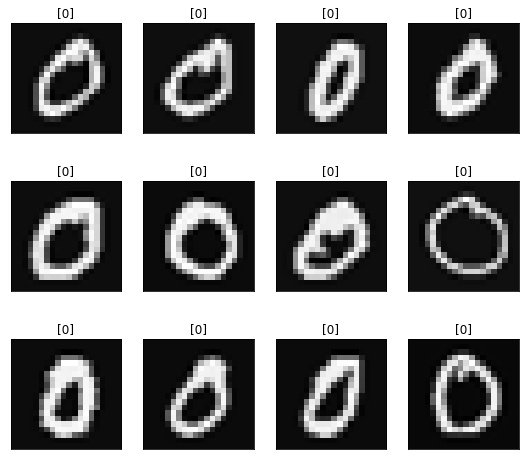

In [45]:
# Zad 3
plot_mnist(X, y, h, w)